# Dependencies

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
root_dir = "/content/drive/My Drive/"
project_folder = "APNet_input_data"
os.chdir(root_dir + project_folder)
!pwd

Mounted at /content/drive
/content/drive/My Drive/APNet_input_data


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# MGH cohort

<ipython-input-2-5fc98c51ec5b>:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 0].set_xticklabels(pre_existing_conditions_counts.index, rotation=45)


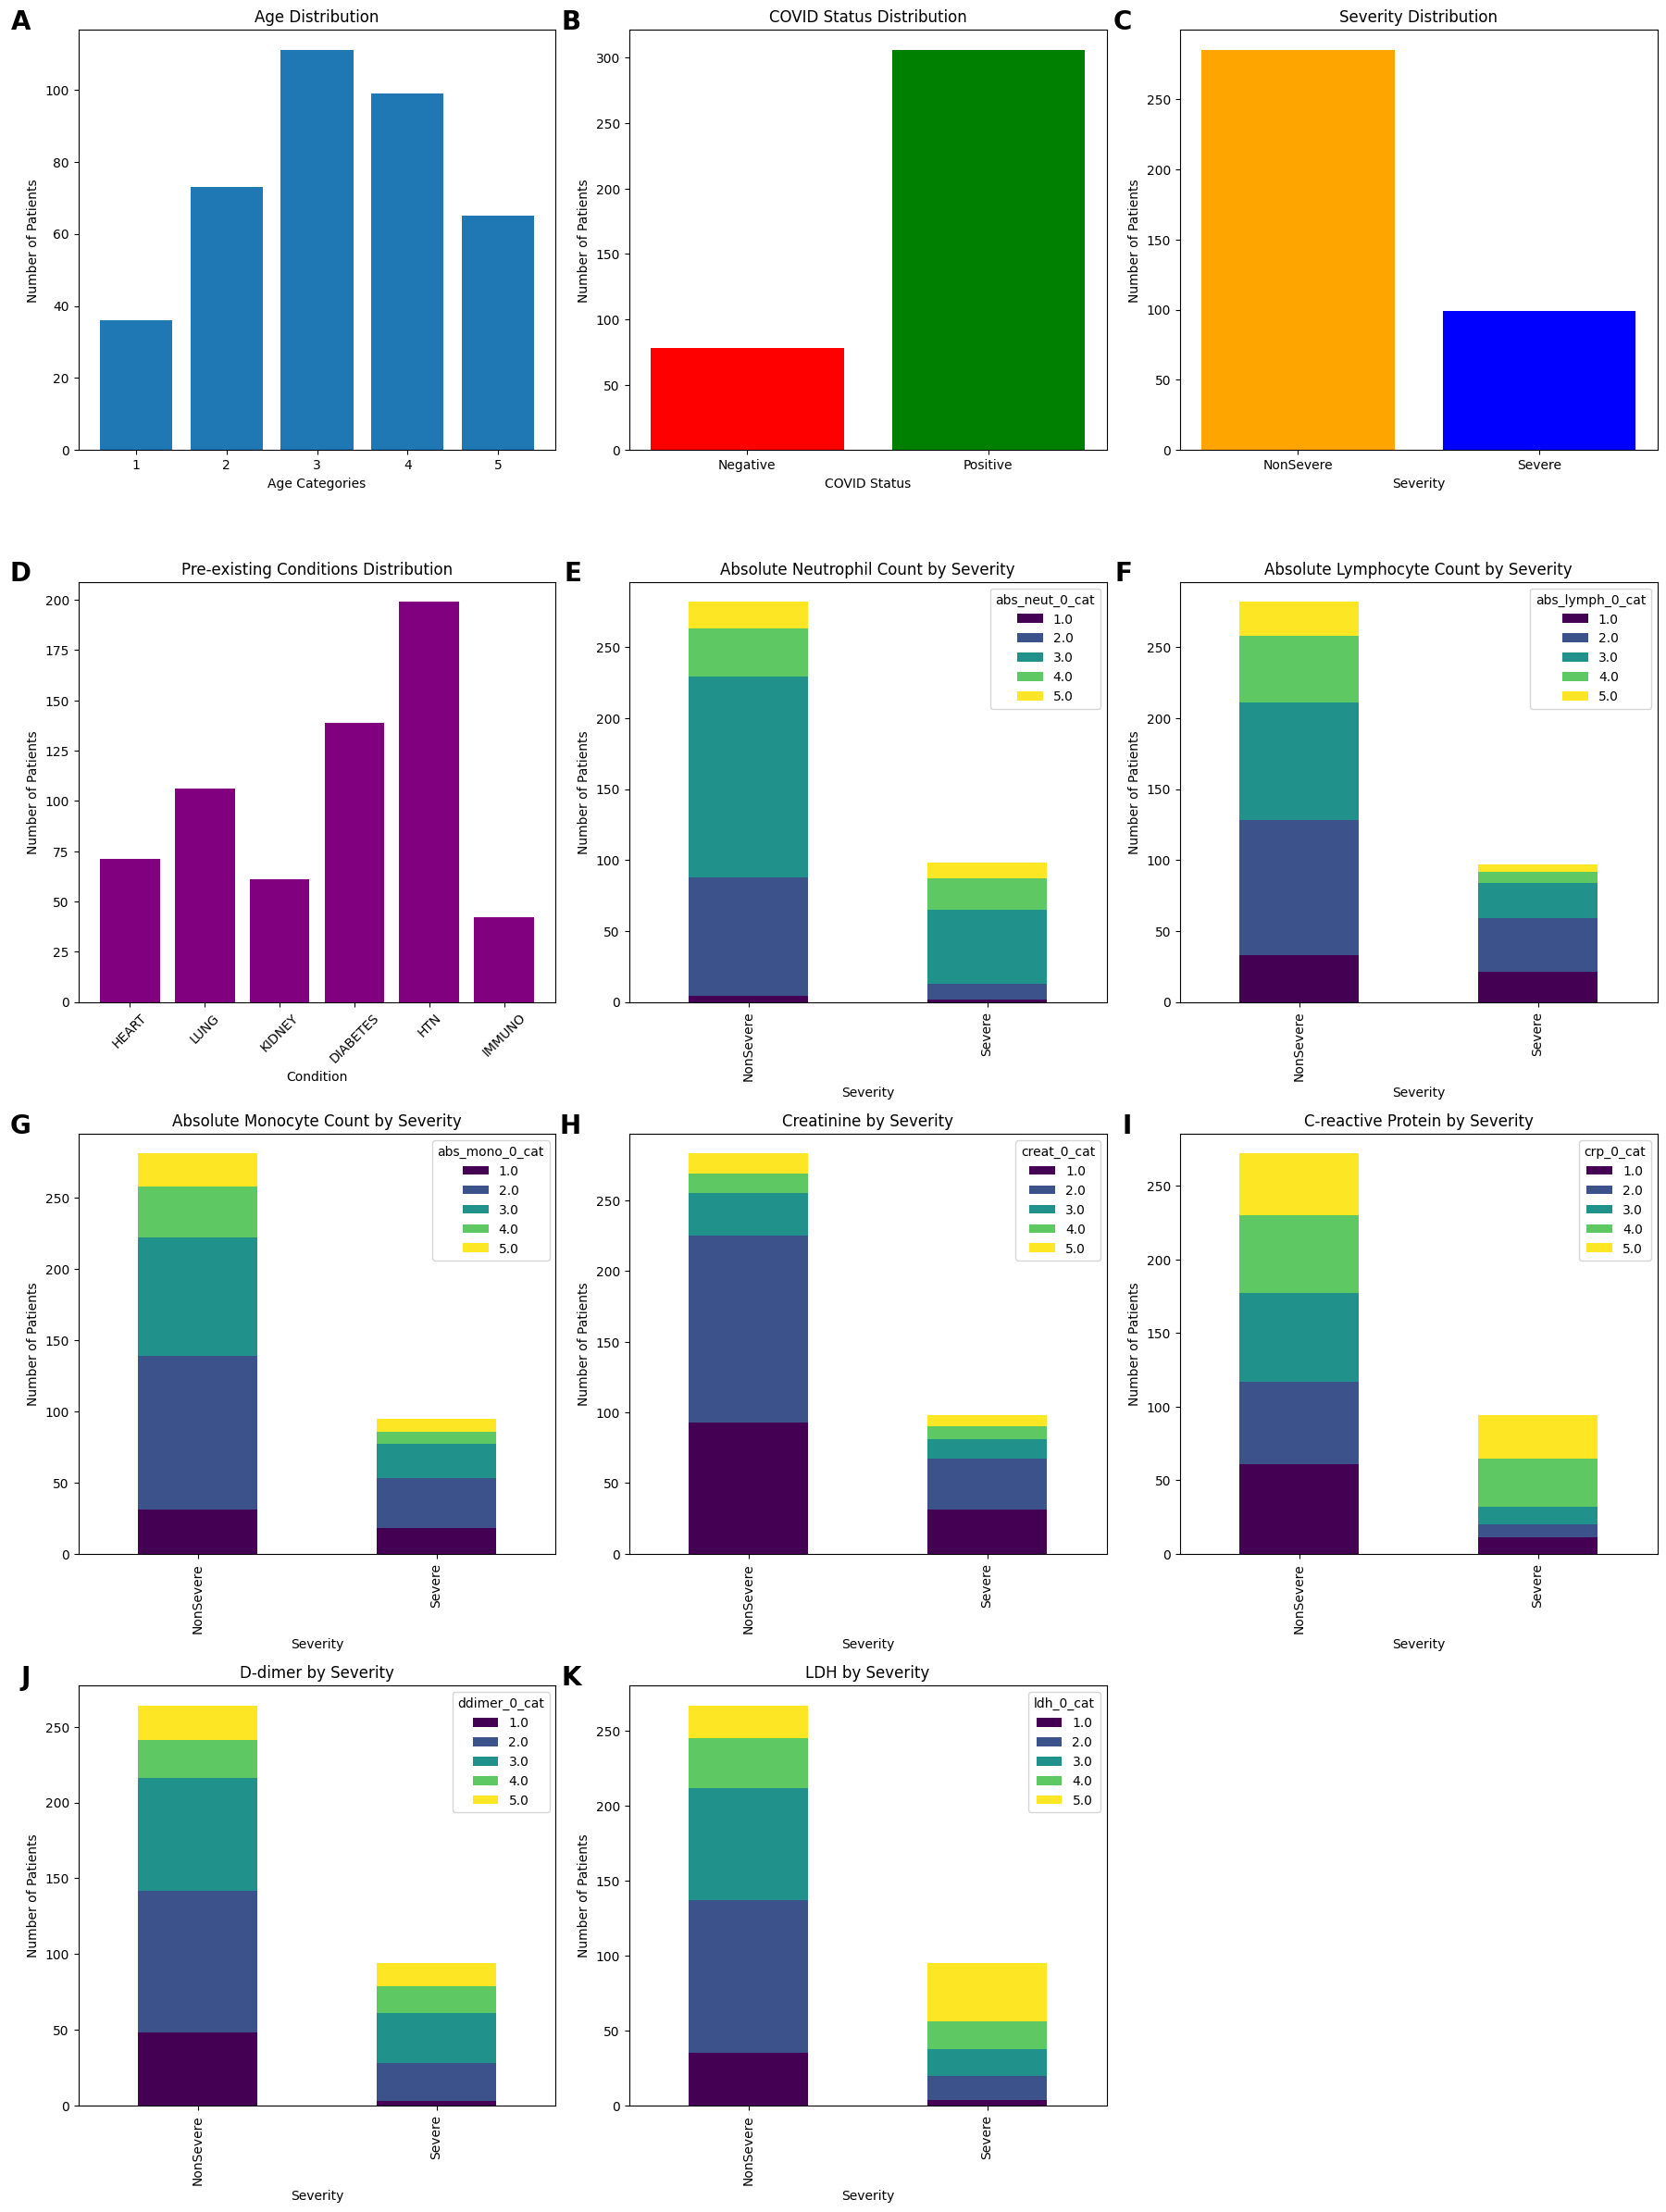

In [2]:
# Load the data
clinical_metadata_path_new = 'mgh_clinical_metadata.xlsx'
covid_clinical_info_path = 'MGH_COVID_Clinical_Info.xlsx'
clinical_metadata_new = pd.read_excel(clinical_metadata_path_new)
covid_clinical_info = pd.read_excel(covid_clinical_info_path)

# Adding severity mapping to the data
severity_mapping = {1: 'Severe', 2: 'Severe', 3: 'NonSevere', 4: 'NonSevere', 5: 'NonSevere'}
covid_clinical_info['Severity'] = covid_clinical_info['Acuity_0'].map(severity_mapping)

# Extracting data for visualizations
age_data = covid_clinical_info['Age_cat']
covid_status_data = covid_clinical_info['COVID']
severity_data = covid_clinical_info['Severity']
pre_existing_conditions = covid_clinical_info[['HEART', 'LUNG', 'KIDNEY', 'DIABETES', 'HTN', 'IMMUNO']]
abs_neut_0_cat_data = covid_clinical_info['abs_neut_0_cat']
abs_lymph_0_cat_data = covid_clinical_info['abs_lymph_0_cat']
abs_mono_0_cat_data = covid_clinical_info['abs_mono_0_cat']
creat_0_cat_data = covid_clinical_info['creat_0_cat']
crp_0_cat_data = covid_clinical_info['crp_0_cat']
ddimer_0_cat_data = covid_clinical_info['ddimer_0_cat']

# Creating the multipanel figure with the specified data
fig, axes = plt.subplots(4, 3, figsize=(18, 24))

# 1. Age Distribution (Panel A)
axes[0, 0].bar(age_data.value_counts().sort_index().index, age_data.value_counts().sort_index().values)
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age Categories')
axes[0, 0].set_ylabel('Number of Patients')
axes[0, 0].text(-0.1, 1.05, 'A', transform=axes[0, 0].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# 2. COVID Status (Panel B)
axes[0, 1].bar(covid_status_data.value_counts().index, covid_status_data.value_counts().values, color=['green', 'red'])
axes[0, 1].set_title('COVID Status Distribution')
axes[0, 1].set_xlabel('COVID Status')
axes[0, 1].set_ylabel('Number of Patients')
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(['Negative', 'Positive'])
axes[0, 1].text(-0.1, 1.05, 'B', transform=axes[0, 1].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# 3. Severity (Panel C)
axes[0, 2].bar(severity_data.value_counts().index, severity_data.value_counts().values, color=['orange', 'blue'])
axes[0, 2].set_title('Severity Distribution')
axes[0, 2].set_xlabel('Severity')
axes[0, 2].set_ylabel('Number of Patients')
axes[0, 2].text(-0.1, 1.05, 'C', transform=axes[0, 2].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# 4. Pre-existing Conditions (Panel D)
pre_existing_conditions_counts = pre_existing_conditions.sum()
axes[1, 0].bar(pre_existing_conditions_counts.index, pre_existing_conditions_counts.values, color='purple')
axes[1, 0].set_title('Pre-existing Conditions Distribution')
axes[1, 0].set_xlabel('Condition')
axes[1, 0].set_ylabel('Number of Patients')
axes[1, 0].set_xticklabels(pre_existing_conditions_counts.index, rotation=45)
axes[1, 0].text(-0.1, 1.05, 'D', transform=axes[1, 0].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# 5. Absolute Neutrophil Count by Severity (Panel E)
abs_neut_by_severity = covid_clinical_info.groupby('Severity')['abs_neut_0_cat'].value_counts().unstack().fillna(0)
abs_neut_by_severity.plot(kind='bar', stacked=True, ax=axes[1, 1], colormap='viridis')
axes[1, 1].set_title('Absolute Neutrophil Count by Severity')
axes[1, 1].set_xlabel('Severity')
axes[1, 1].set_ylabel('Number of Patients')
axes[1, 1].text(-0.1, 1.05, 'E', transform=axes[1, 1].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# 6. Absolute Lymphocyte Count by Severity (Panel F)
abs_lymph_by_severity = covid_clinical_info.groupby('Severity')['abs_lymph_0_cat'].value_counts().unstack().fillna(0)
abs_lymph_by_severity.plot(kind='bar', stacked=True, ax=axes[1, 2], colormap='viridis')
axes[1, 2].set_title('Absolute Lymphocyte Count by Severity')
axes[1, 2].set_xlabel('Severity')
axes[1, 2].set_ylabel('Number of Patients')
axes[1, 2].text(-0.1, 1.05, 'F', transform=axes[1, 2].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# 7. Absolute Monocyte Count by Severity (Panel G)
abs_mono_by_severity = covid_clinical_info.groupby('Severity')['abs_mono_0_cat'].value_counts().unstack().fillna(0)
abs_mono_by_severity.plot(kind='bar', stacked=True, ax=axes[2, 0], colormap='viridis')
axes[2, 0].set_title('Absolute Monocyte Count by Severity')
axes[2, 0].set_xlabel('Severity')
axes[2, 0].set_ylabel('Number of Patients')
axes[2, 0].text(-0.1, 1.05, 'G', transform=axes[2, 0].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# 8. Creatinine by Severity (Panel H)
creat_by_severity = covid_clinical_info.groupby('Severity')['creat_0_cat'].value_counts().unstack().fillna(0)
creat_by_severity.plot(kind='bar', stacked=True, ax=axes[2, 1], colormap='viridis')
axes[2, 1].set_title('Creatinine by Severity')
axes[2, 1].set_xlabel('Severity')
axes[2, 1].set_ylabel('Number of Patients')
axes[2, 1].text(-0.1, 1.05, 'H', transform=axes[2, 1].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# 9. C-reactive Protein by Severity (Panel I)
crp_by_severity = covid_clinical_info.groupby('Severity')['crp_0_cat'].value_counts().unstack().fillna(0)
crp_by_severity.plot(kind='bar', stacked=True, ax=axes[2, 2], colormap='viridis')
axes[2, 2].set_title('C-reactive Protein by Severity')
axes[2, 2].set_xlabel('Severity')
axes[2, 2].set_ylabel('Number of Patients')
axes[2, 2].text(-0.1, 1.05, 'I', transform=axes[2, 2].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# 10. D-dimer by Severity (Panel J)
ddimer_by_severity = covid_clinical_info.groupby('Severity')['ddimer_0_cat'].value_counts().unstack().fillna(0)
ddimer_by_severity.plot(kind='bar', stacked=True, ax=axes[3, 0], colormap='viridis')
axes[3, 0].set_title('D-dimer by Severity')
axes[3, 0].set_xlabel('Severity')
axes[3, 0].set_ylabel('Number of Patients')
axes[3, 0].text(-0.1, 1.05, 'J', transform=axes[3, 0].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# 11. LDH by Severity (Panel J)
ldh_by_severity = covid_clinical_info.groupby('Severity')['ldh_0_cat'].value_counts().unstack().fillna(0)
ldh_by_severity.plot(kind='bar', stacked=True, ax=axes[3, 1], colormap='viridis')
axes[3, 1].set_title('LDH by Severity')
axes[3, 1].set_xlabel('Severity')
axes[3, 1].set_ylabel('Number of Patients')
axes[3, 1].text(-0.1, 1.05, 'K', transform=axes[3, 1].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# Hide the last empty placeholders
#axes[3, 1].axis('off')
axes[3, 2].axis('off')

plt.tight_layout()
plt.savefig('MGH_clinical_cohort.png', format='png', dpi=300)
plt.show()

# Mayo cohort

<ipython-input-6-de680a76cd90>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=clinical_metadata_df_selected, x='WHOscale', palette='viridis', ax=axes[0, 0], order=order)
<ipython-input-6-de680a76cd90>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=clinical_metadata_df_selected, x='Severity', palette='viridis', ax=axes[0, 1])


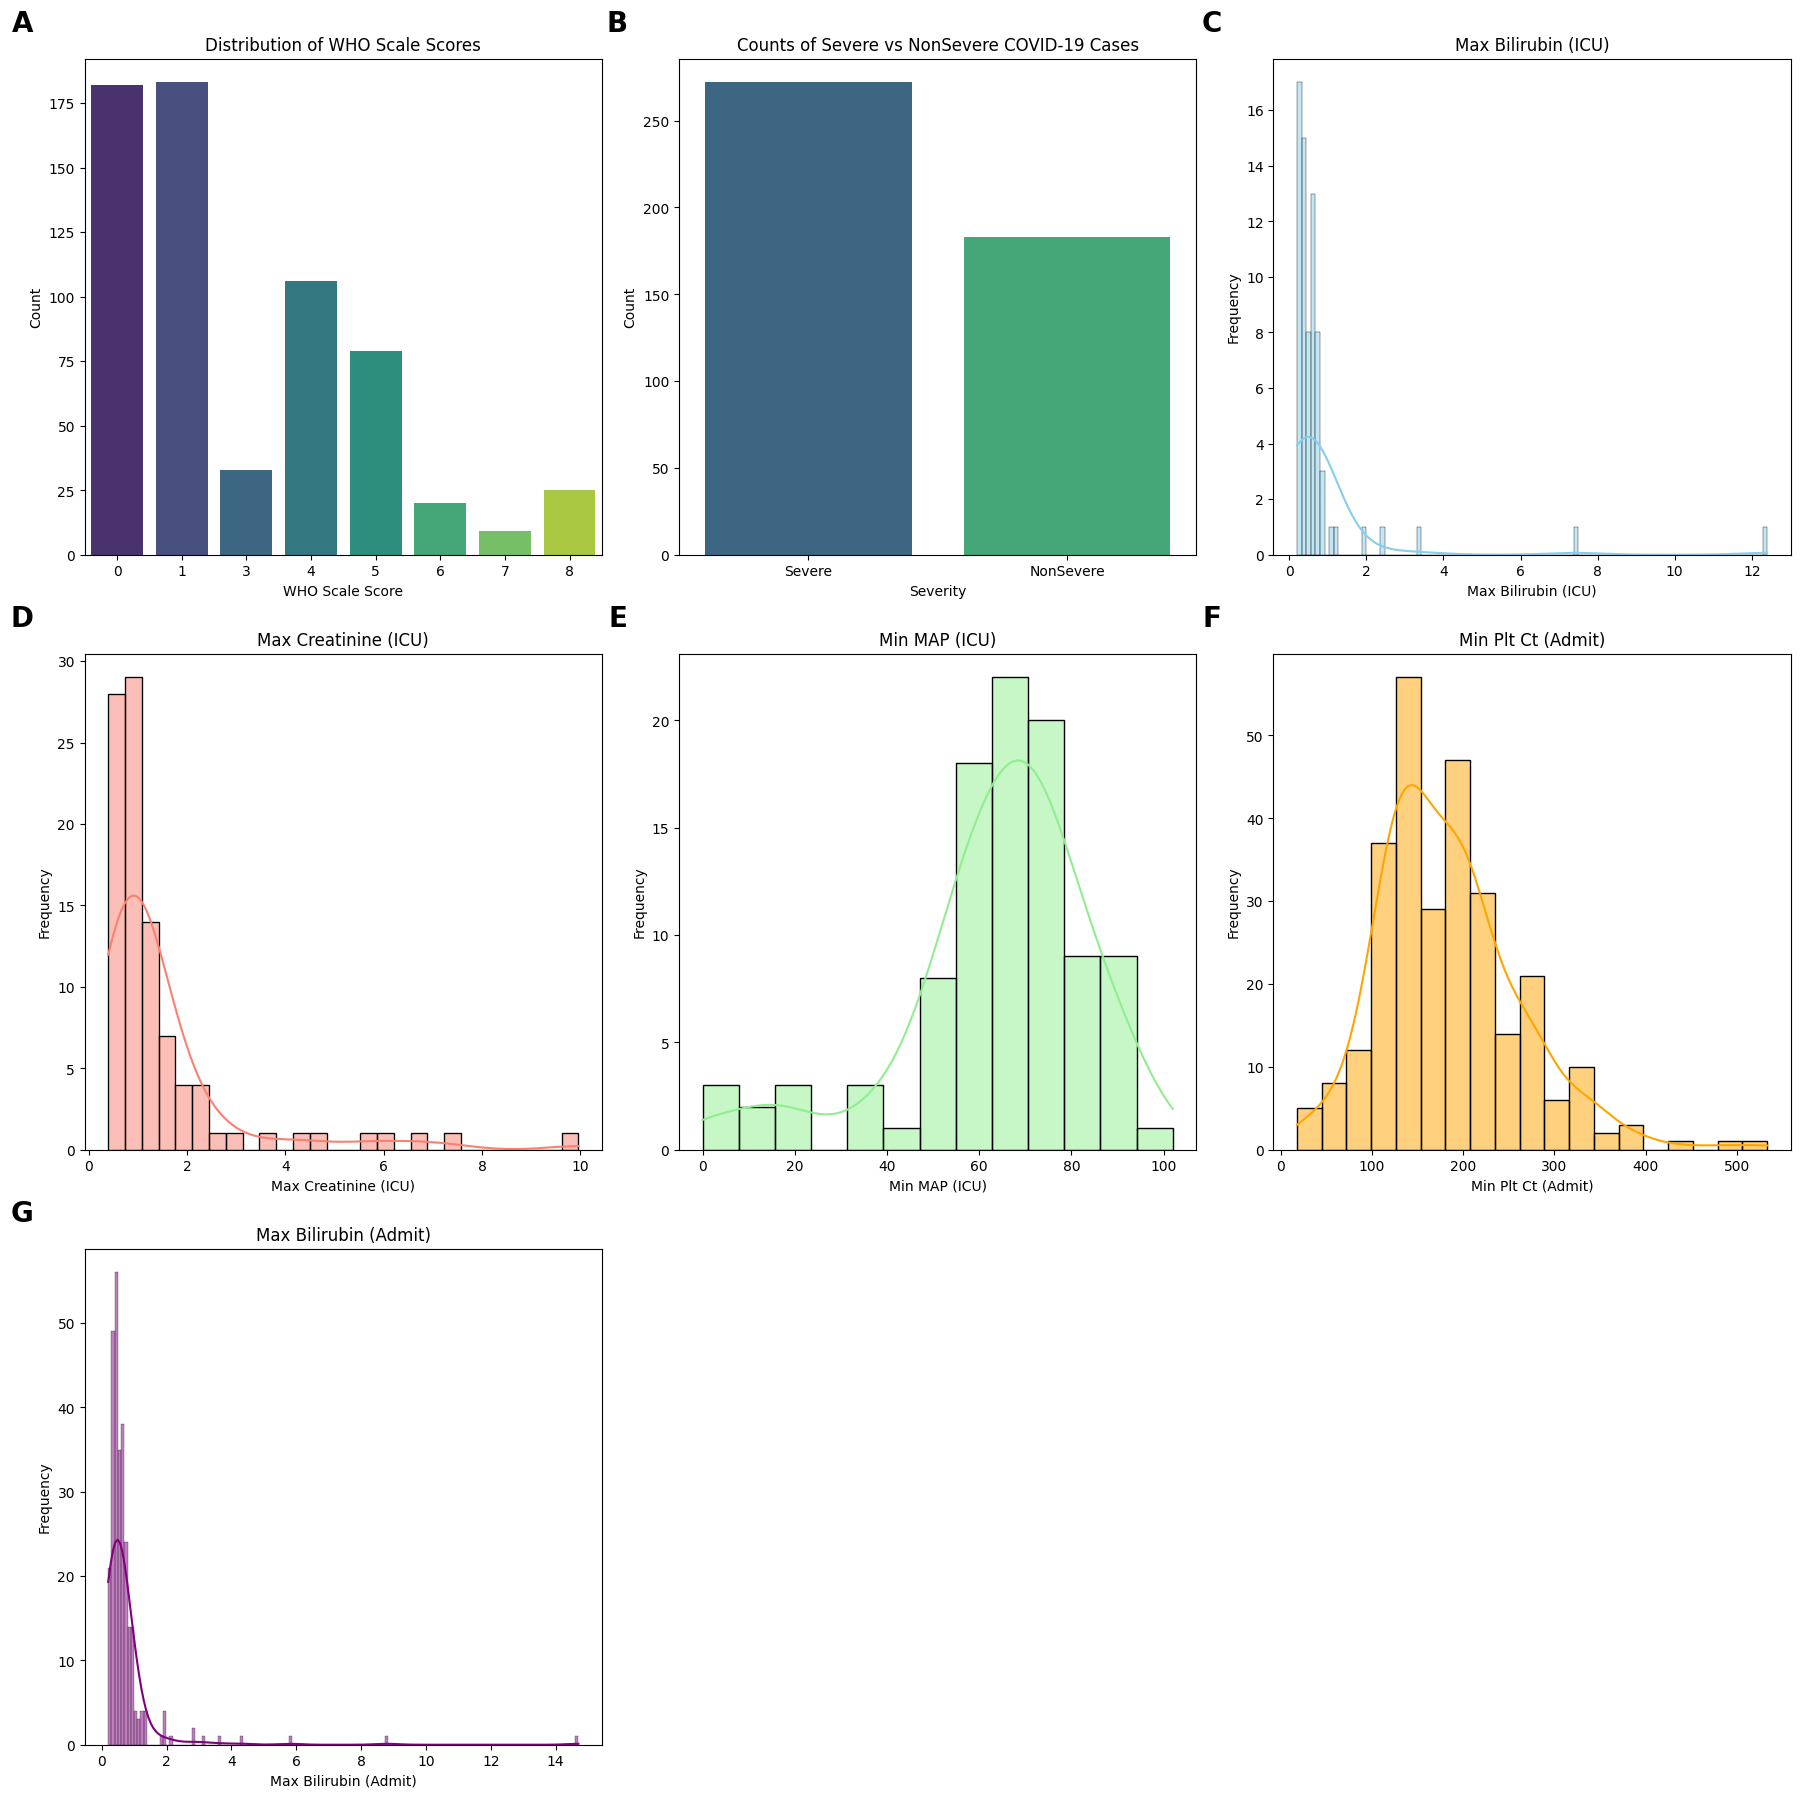

In [6]:
clinical_metadata_df = pd.read_excel('Mayo_clinical_metadata.xlsx')

# Select relevant columns from clinical metadata
columns_of_interest = [
    'Sample', 'Test/Train', 'Diagnosis', 'WHOscale', 'Group', 'CharlsonComorbidityIndex', 'Age', 'Race', 'Sex', 'Ethnicity',
    'Hosp Problems with ICD 10', 'Max Bilirubin (ICU)', 'Max Creatinine (ICU)', 'Min MAP (ICU)', 'Min Plt Ct (Admit)',
    'Max Bilirubin (Admit)', 'Max Creatinine (Admit)', 'Date of admission', 'Date of sample collection', 'Days from Admission'
]
clinical_metadata_df_selected = clinical_metadata_df[columns_of_interest]

# Map WHOscale to 'Severe' and 'NonSevere' based on condition_map_mayo
condition_map_mayo = {'1': 'NonSevere', '2': 'NonSevere', '3': 'Severe', '4': 'Severe', '5': 'Severe', '6': 'Severe', '7': 'Severe', '8': 'Severe'}
clinical_metadata_df_selected['WHOscale'] = clinical_metadata_df_selected['WHOscale'].astype(str)
clinical_metadata_df_selected['Severity'] = clinical_metadata_df_selected['WHOscale'].map(condition_map_mayo)

# Ensure WHOscale is in the correct order
order = ['0', '1', '3', '4', '5', '6', '7', '8']

# Create the multipanel figure
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# Plot 1: Distribution of WHO Scale Scores
sns.countplot(data=clinical_metadata_df_selected, x='WHOscale', palette='viridis', ax=axes[0, 0], order=order)
axes[0, 0].set_title('Distribution of WHO Scale Scores')
axes[0, 0].set_xlabel('WHO Scale Score')
axes[0, 0].set_ylabel('Count')
axes[0, 0].text(-0.1, 1.1, 'A', transform=axes[0, 0].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# Plot 2: Counts of Severe vs NonSevere COVID-19 Cases
sns.countplot(data=clinical_metadata_df_selected, x='Severity', palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Counts of Severe vs NonSevere COVID-19 Cases')
axes[0, 1].set_xlabel('Severity')
axes[0, 1].set_ylabel('Count')
axes[0, 1].text(-0.1, 1.1, 'B', transform=axes[0, 1].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# Plot 3: Max Bilirubin (ICU)
sns.histplot(data=clinical_metadata_df_selected, x='Max Bilirubin (ICU)', kde=True, color='skyblue', ax=axes[0, 2])
axes[0, 2].set_title('Max Bilirubin (ICU)')
axes[0, 2].set_xlabel('Max Bilirubin (ICU)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].text(-0.1, 1.1, 'C', transform=axes[0, 2].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# Plot 4: Max Creatinine (ICU)
sns.histplot(data=clinical_metadata_df_selected, x='Max Creatinine (ICU)', kde=True, color='salmon', ax=axes[1, 0])
axes[1, 0].set_title('Max Creatinine (ICU)')
axes[1, 0].set_xlabel('Max Creatinine (ICU)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].text(-0.1, 1.1, 'D', transform=axes[1, 0].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# Plot 5: Min MAP (ICU)
sns.histplot(data=clinical_metadata_df_selected, x='Min MAP (ICU)', kde=True, color='lightgreen', ax=axes[1, 1])
axes[1, 1].set_title('Min MAP (ICU)')
axes[1, 1].set_xlabel('Min MAP (ICU)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].text(-0.1, 1.1, 'E', transform=axes[1, 1].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# Plot 6: Min Plt Ct (Admit)
sns.histplot(data=clinical_metadata_df_selected, x='Min Plt Ct (Admit)', kde=True, color='orange', ax=axes[1, 2])
axes[1, 2].set_title('Min Plt Ct (Admit)')
axes[1, 2].set_xlabel('Min Plt Ct (Admit)')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].text(-0.1, 1.1, 'F', transform=axes[1, 2].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# Plot 7: Max Bilirubin (Admit)
sns.histplot(data=clinical_metadata_df_selected, x='Max Bilirubin (Admit)', kde=True, color='purple', ax=axes[2, 0])
axes[2, 0].set_title('Max Bilirubin (Admit)')
axes[2, 0].set_xlabel('Max Bilirubin (Admit)')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].text(-0.1, 1.1, 'G', transform=axes[2, 0].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# Remove empty plots
fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

plt.tight_layout()
plt.savefig('Mayo_clinical_cohort.png', format='png', dpi=300)
plt.show()

# Stanford

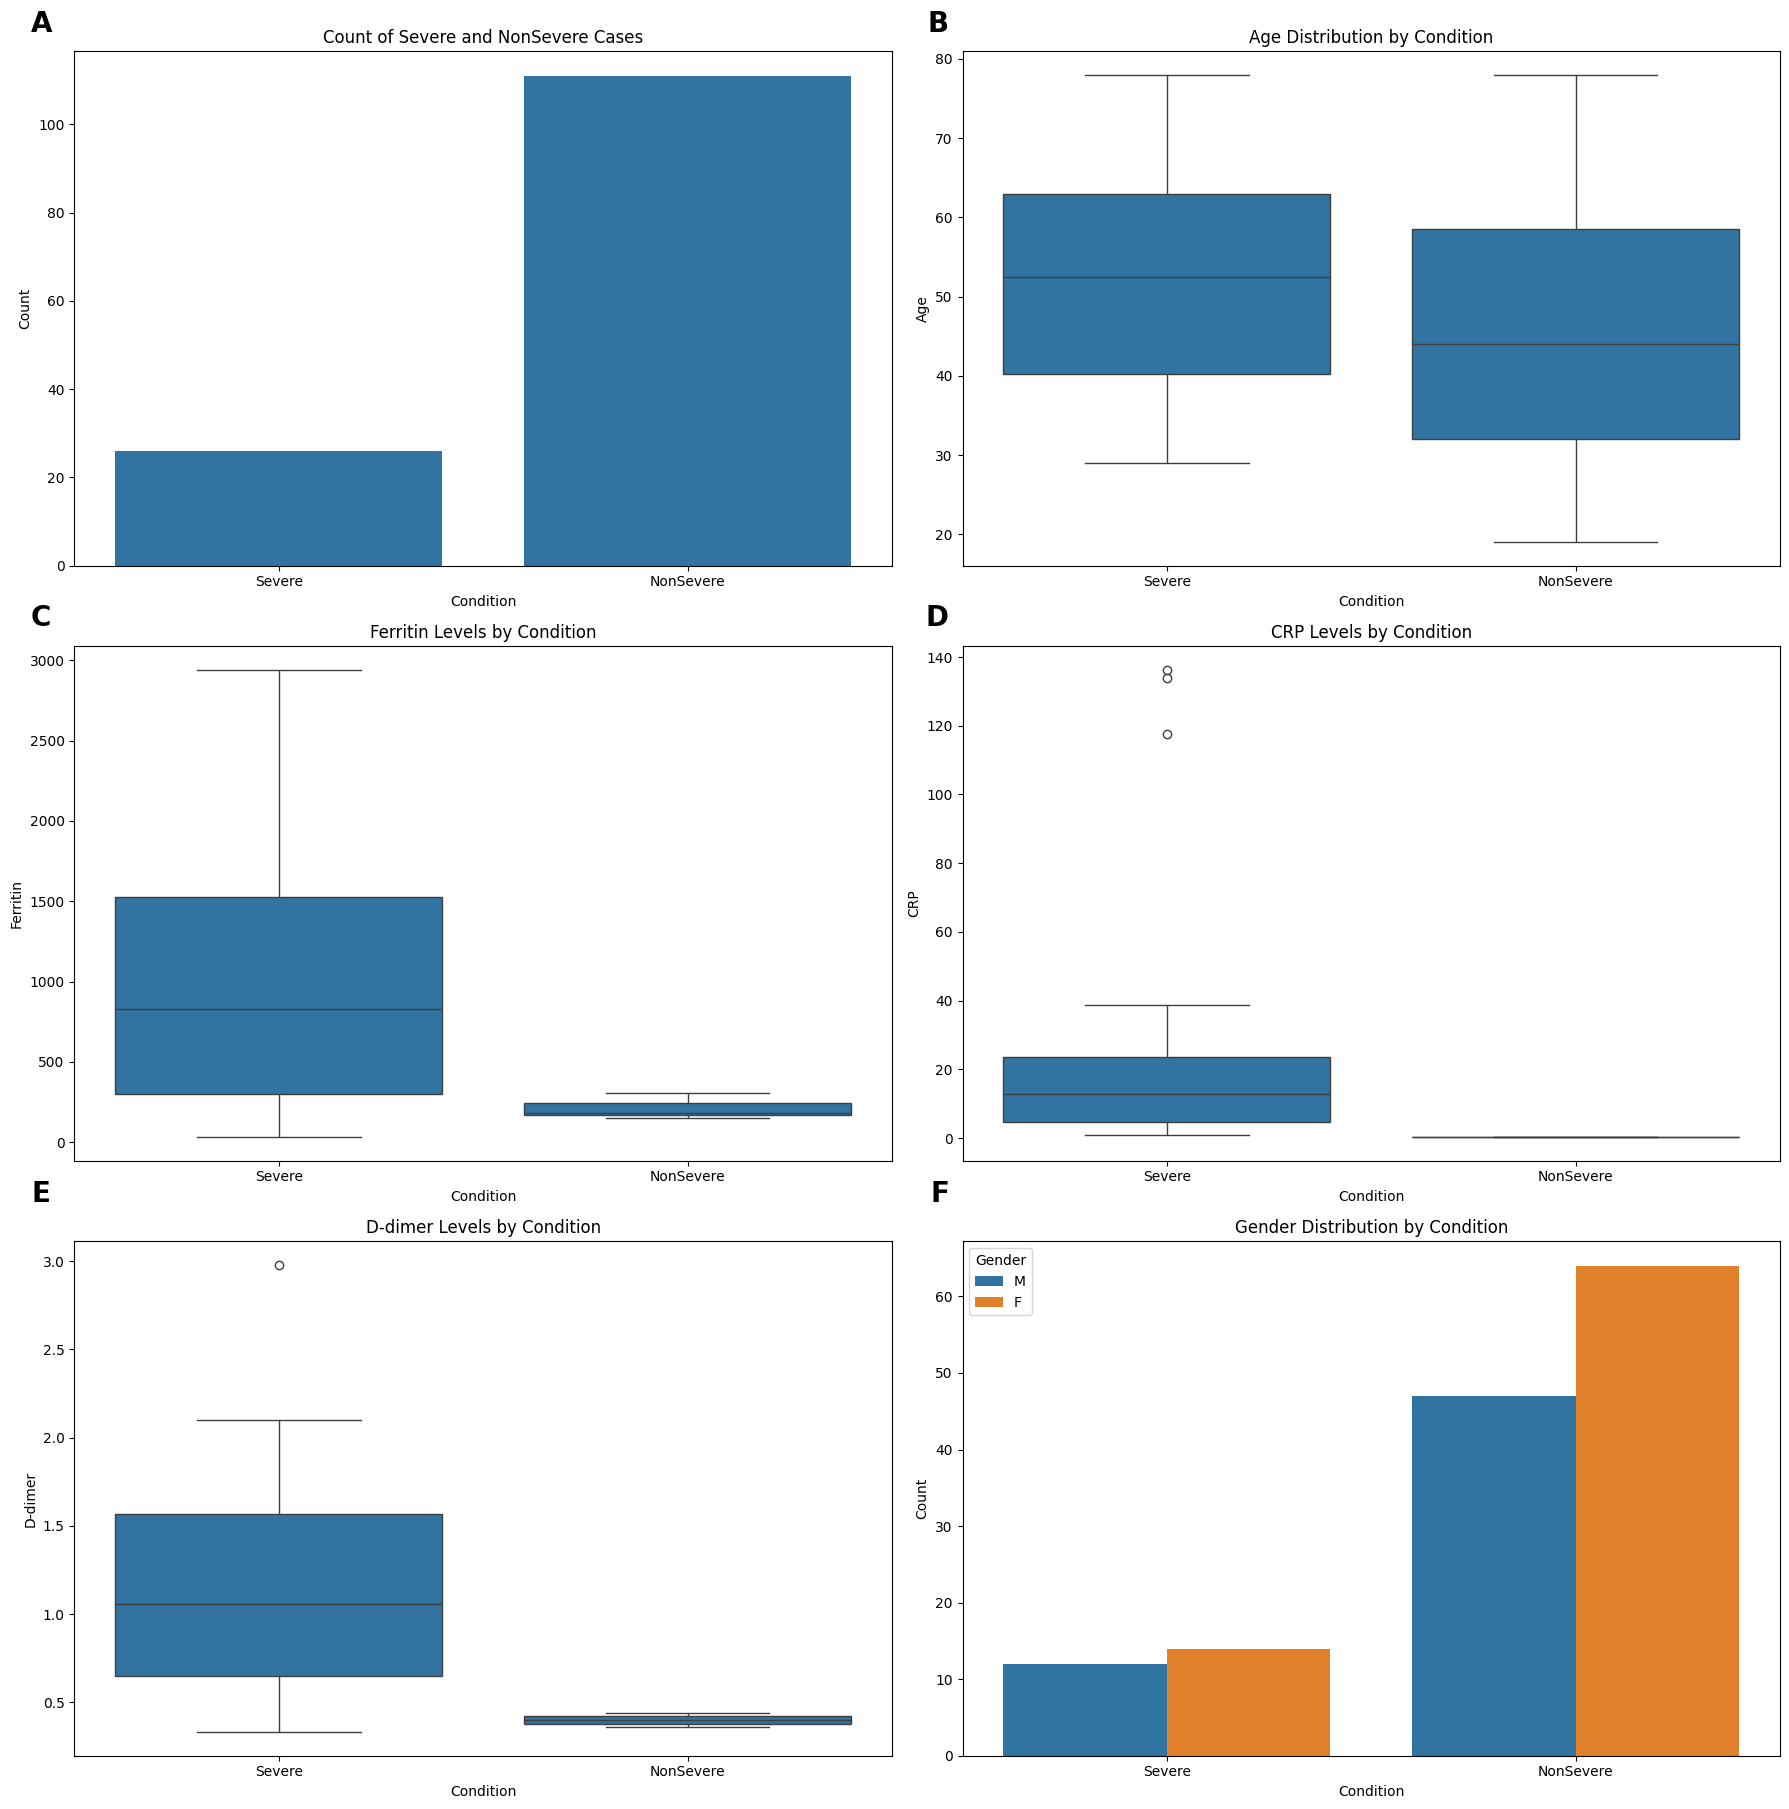

In [7]:
# Load the datasets
activity_matrix = pd.read_csv('MGH_Stanford_experiment/Stanford_activity_matrix/activity_matrix.csv')
patient_characteristics = pd.read_csv('PatientCharacteristics.csv')

# Map the condition to Severe and NonSevere
condition_map_stanford = {'Asymptomatic': 'NonSevere', 'Healthy': 'NonSevere', 'Mild': 'NonSevere', 'Moderate': 'NonSevere', 'Severe': 'Severe'}
patient_characteristics['Condition'] = patient_characteristics['Severity'].map(condition_map_stanford)

# Convert CRP and D-dimer columns to numeric, coercing errors
patient_characteristics['CRP'] = pd.to_numeric(patient_characteristics['CRP'], errors='coerce')
patient_characteristics['D-dimer'] = pd.to_numeric(patient_characteristics['D-dimer'], errors='coerce')

# Create a multipanel figure for all the plots with A-F notations
fig, axs = plt.subplots(3, 2, figsize=(18, 18))

# Barplot of Severity counts
sns.countplot(data=patient_characteristics, x='Condition', order=['Severe', 'NonSevere'], ax=axs[0, 0])
axs[0, 0].set_title('Count of Severe and NonSevere Cases')
axs[0, 0].set_xlabel('Condition')
axs[0, 0].set_ylabel('Count')

# Boxplot of Age by Condition
sns.boxplot(data=patient_characteristics, x='Condition', y='Age', order=['Severe', 'NonSevere'], ax=axs[0, 1])
axs[0, 1].set_title('Age Distribution by Condition')
axs[0, 1].set_xlabel('Condition')
axs[0, 1].set_ylabel('Age')

# Boxplot of Ferritin by Condition
sns.boxplot(data=patient_characteristics, x='Condition', y='Ferritin', order=['Severe', 'NonSevere'], ax=axs[1, 0])
axs[1, 0].set_title('Ferritin Levels by Condition')
axs[1, 0].set_xlabel('Condition')
axs[1, 0].set_ylabel('Ferritin')

# Boxplot of CRP by Condition
sns.boxplot(data=patient_characteristics, x='Condition', y='CRP', order=['Severe', 'NonSevere'], ax=axs[1, 1])
axs[1, 1].set_title('CRP Levels by Condition')
axs[1, 1].set_xlabel('Condition')
axs[1, 1].set_ylabel('CRP')

# Boxplot of D-dimer by Condition
sns.boxplot(data=patient_characteristics, x='Condition', y='D-dimer', order=['Severe', 'NonSevere'], ax=axs[2, 0])
axs[2, 0].set_title('D-dimer Levels by Condition')
axs[2, 0].set_xlabel('Condition')
axs[2, 0].set_ylabel('D-dimer')

# Barplot of Gender distribution by Condition
sns.countplot(data=patient_characteristics, x='Condition', hue='Gender', order=['Severe', 'NonSevere'], ax=axs[2, 1])
axs[2, 1].set_title('Gender Distribution by Condition')
axs[2, 1].set_xlabel('Condition')
axs[2, 1].set_ylabel('Count')

# Add A-F notations with adjusted vertical spacing
fig.text(0.02, 0.99, 'A', size=20, weight='bold', ha='left')
fig.text(0.53, 0.99, 'B', size=20, weight='bold', ha='right')
fig.text(0.02, 0.66, 'C', size=20, weight='bold', ha='left')
fig.text(0.53, 0.66, 'D', size=20, weight='bold', ha='right')
fig.text(0.02, 0.34, 'E', size=20, weight='bold', ha='left')
fig.text(0.53, 0.34, 'F', size=20, weight='bold', ha='right')

# Adjust layout
plt.tight_layout()
plt.savefig('Stanford_clinical_cohort.png', format='png', dpi=300)
plt.show()